In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.shape

(4177, 9)

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

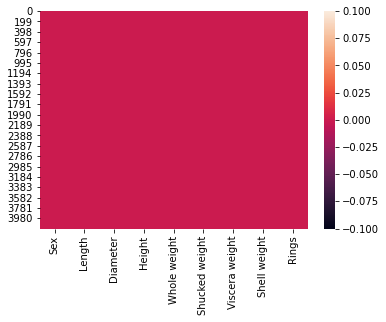

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rings'], float64: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], object: ['Sex']}

<AxesSubplot:xlabel='Length', ylabel='Density'>

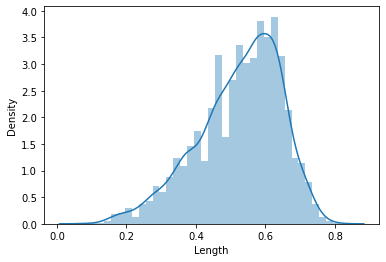

In [14]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

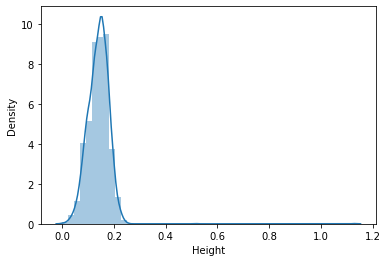

In [17]:
sns.distplot(df['Height'])


<AxesSubplot:xlabel='Rings', ylabel='Density'>

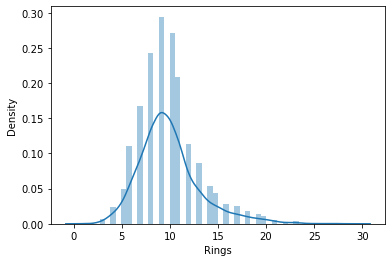

In [18]:
sns.distplot(df['Rings'])


<AxesSubplot:xlabel='Sex', ylabel='count'>

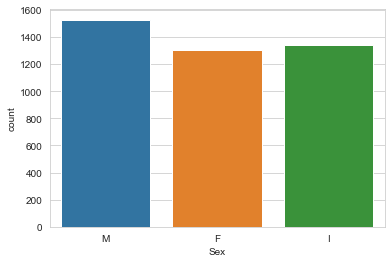

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

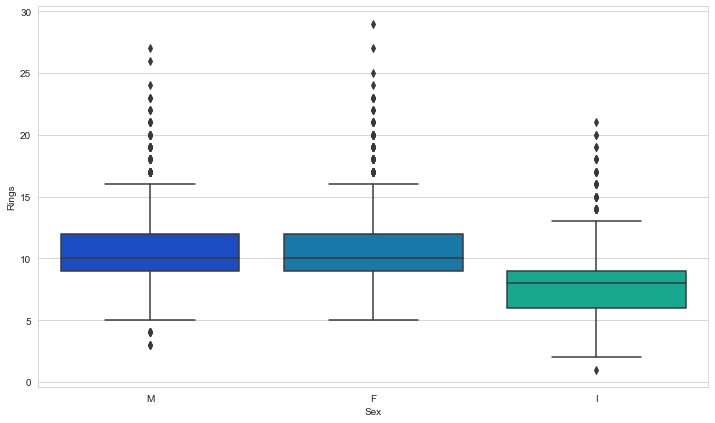

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex',y='Rings',data=df,palette='winter')

In [21]:
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

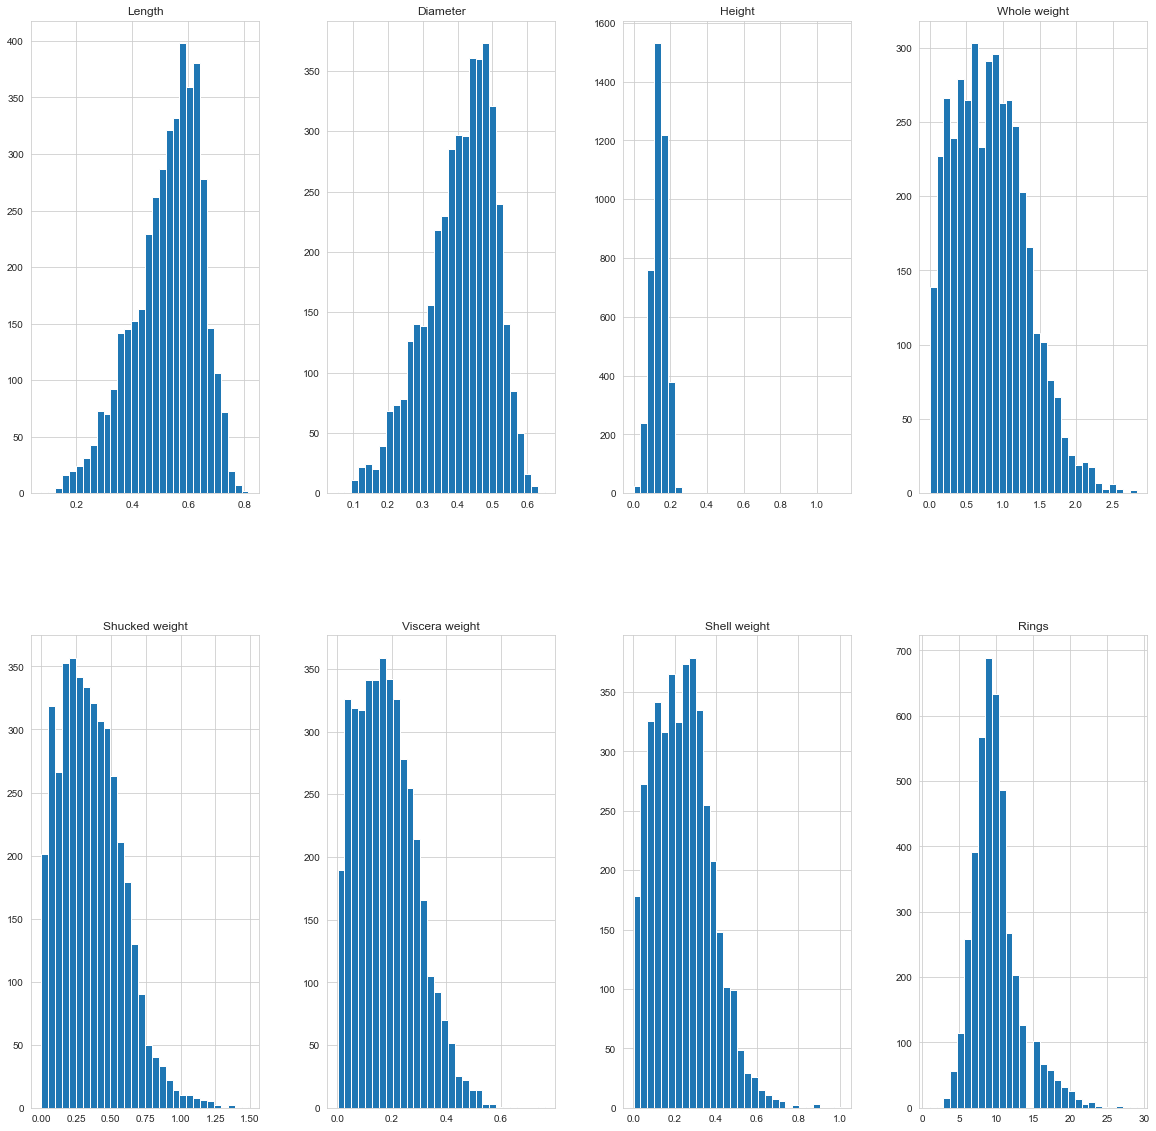

In [22]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [24]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [25]:
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))


Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
26    0.000239
29    0.000239
25    0.000239
1     0.000239
2     0.000239
Name: Rings, dtype: float64


In [26]:
print(len(df.Rings.unique()))

28


In [27]:
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [29]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [31]:
threshold=3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

In [32]:
z[6][8]


3.12251641377204

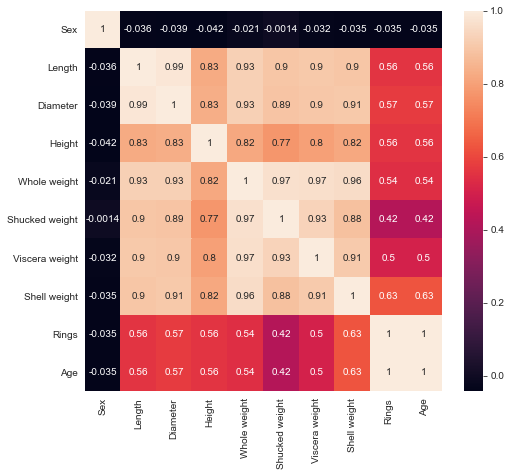

In [33]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [34]:
df_new=df[(z<3).all(axis=1)]


In [36]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [38]:
df.shape

(4177, 10)

In [39]:
df_new.shape

(4027, 10)

In [40]:
y=df[['Rings']]
x=df.drop(['Rings'], axis = 1)

In [41]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [43]:
x_train.shape


(2798, 9)

In [44]:
y_train.shape

(2798, 1)

In [45]:
x_test.shape

(1379, 9)

In [46]:
y_test.shape

(1379, 1)

In [47]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
lm.coef_

array([[ 2.84662895e-16, -1.08229724e-15,  1.03501148e-15,
         3.46515263e-16, -4.03631006e-17, -4.80330181e-16,
         1.78279595e-17,  4.30325664e-16,  3.22378307e+00]])

In [49]:
lm.intercept_

array([9.93368446])

In [50]:
lm.score(x_train,y_train)

1.0

In [51]:
from sklearn.linear_model import Lasso,Ridge

In [52]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9059065577949273

In [53]:
ls.coef_

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  2.23489875])

In [54]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999997341474238

In [55]:
rd.coef_

array([[ 4.82652761e-05, -2.14637925e-05,  9.12727172e-04,
         3.50231159e-04,  3.54569733e-03, -3.55696765e-03,
        -7.82158620e-04,  9.05473565e-04,  3.22134768e+00]])

In [56]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.8240941457555626


array([-0.        ,  0.01644398,  0.06139249,  0.06885332,  0.        ,
        0.        ,  0.        ,  0.23736965,  1.6718055 ])

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
rfr.score(x_train,y_train)

0.999940678484644

In [61]:
rfr=RandomForestRegressor(n_estimators=300,random_state=46)

In [63]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=46)

In [64]:
rfr.score(x_train,y_train)

0.9999396888858726

In [66]:
import joblib
joblib.dump(df,'Abalone Case Study.pkl')

['Abalone Case Study.pkl']